<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula07_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

2110848/2110848 [==============================] - 1s 0us/step


((8982,), (8982,), (2246,), (2246,))

In [2]:
train_data[0:1], train_labels[0:1]

(array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
       dtype=object),
 array([3]))

In [4]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), train_data[0])

550378/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape, x_train[0:3,:50]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
         1., 0.]]))

In [11]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(train_data)
x_test = tokenizer.sequences_to_matrix(test_data)
x_train.shape, x_test.shape, x_train[0:3,:50]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
         1., 0.]]))

In [13]:
def to_one_hot(labels):
  dimension = len(set(labels))
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [18]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [20]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [21]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 75ms/step - loss: 2.6318 - accuracy: 0.5101 - val_loss: 1.7612 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 1s 56ms/step - loss: 1.4985 - accuracy: 0.6769 - val_loss: 1.3863 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.1725 - accuracy: 0.7400 - val_loss: 1.2139 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.9665 - accuracy: 0.7912 - val_loss: 1.1238 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.8054 - accuracy: 0.8226 - val_loss: 1.0384 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6696 - accuracy: 0.8508 - val_loss: 0.9810 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 89ms/step - loss: 0.5644 - accuracy: 0.8763 - val_loss: 0.9607 - val_accuracy: 0.7950
Epoch 8/20
16

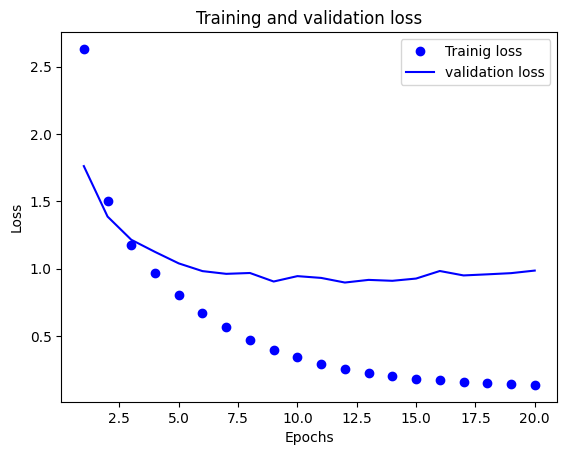

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

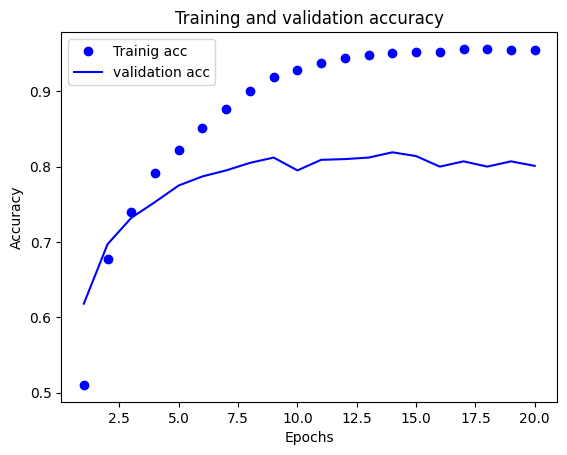

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=8, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 2s 77ms/step - loss: 2.9227 - accuracy: 0.4525 - val_loss: 1.9886 - val_accuracy: 0.6040
Epoch 2/8
16/16 [==============================] - 1s 56ms/step - loss: 1.6402 - accuracy: 0.6735 - val_loss: 1.4049 - val_accuracy: 0.6950
Epoch 3/8
16/16 [==============================] - 1s 55ms/step - loss: 1.2116 - accuracy: 0.7440 - val_loss: 1.1983 - val_accuracy: 0.7340
Epoch 4/8
16/16 [==============================] - 1s 54ms/step - loss: 0.9708 - accuracy: 0.7935 - val_loss: 1.0956 - val_accuracy: 0.7560
Epoch 5/8
16/16 [==============================] - 1s 56ms/step - loss: 0.7936 - accuracy: 0.8312 - val_loss: 1.0152 - val_accuracy: 0.7770
Epoch 6/8
16/16 [==============================] - 1s 56ms/step - loss: 0.6572 - accuracy: 0.8616 - val_loss: 0.9271 - val_accuracy: 0.8100
Epoch 7/8
16/16 [==============================] - 1s 53ms/step - loss: 0.5446 - accuracy: 0.8891 - val_loss: 0.9082 - val_accuracy: 0.8130
Epoch 8/8
16/16 [===

In [27]:
y_pred = model.predict(x_test)
np.argmax(y_pred[0])

71/71 [==============================] - 0s 5ms/step


3

In [28]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 8ms/step - loss: 0.9523 - accuracy: 0.7756


In [35]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 2.5659 - accuracy: 0.5388 - val_loss: 1.8119 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 1s 58ms/step - loss: 1.5293 - accuracy: 0.6997 - val_loss: 1.3754 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.1634 - accuracy: 0.7595 - val_loss: 1.1635 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 0.9436 - accuracy: 0.8019 - val_loss: 1.0522 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.7863 - accuracy: 0.8383 - val_loss: 0.9660 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6671 - accuracy: 0.8648 - val_loss: 0.9137 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 85ms/step - loss: 0.5724 - accuracy: 0.8866 - val_loss: 0.8708 - val_accuracy: 0.8220
Epoch 8/20
16

In [38]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
16/16 [==============================] - 2s 79ms/step - loss: 2.5158 - accuracy: 0.5484 - val_loss: 1.7177 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 66ms/step - loss: 1.4175 - accuracy: 0.7151 - val_loss: 1.2693 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.0509 - accuracy: 0.7839 - val_loss: 1.0735 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.8343 - accuracy: 0.8286 - val_loss: 0.9691 - val_accuracy: 0.7960
Epoch 5/20
16/16 [==============================] - 1s 66ms/step - loss: 0.6792 - accuracy: 0.8622 - val_loss: 0.9050 - val_accuracy: 0.8140
Epoch 6/20
16/16 [==============================] - 1s 64ms/step - loss: 0.5645 - accuracy: 0.8889 - val_loss: 0.8544 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 2s 106ms/step - loss: 0.4735 - accuracy: 0.9049 - val_loss: 0.8232 - val_accuracy: 0.8250
Epoch 8/20
1